In [3]:
import numpy as np
import pandas as pd
import glob
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

path = r'D:\Summer Practicum\1_Data\On_Time_Marketing_Carrier_On_Time_Performance_Beginning_January_2018_2023_All_Months'
all_files = glob.glob(os.path.join(path,'*.csv'))

# Read all files in the Data folder
df = pd.concat((pd.read_csv(file,low_memory = False) for file in all_files),ignore_index = True)

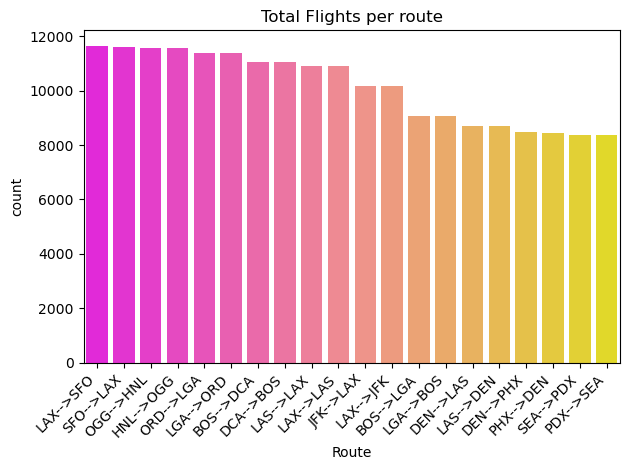

In [ ]:
# Which routes are the most frequent?
# Remove all flights that were cancelled or diverted
# Pair flights by origin and destination 
frequent_routes = df.groupby(['Origin','Dest']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
frequent_routes['Route'] = frequent_routes['Origin'].astype(str)+'-->'+frequent_routes['Dest'].astype(str)

# Plot top 10 routes
top_10_routes = (frequent_routes[['Route','count']].nlargest(20,'count'))
sns.barplot(data=top_10_routes,x='Route',y='count',hue='Route',palette='spring')
plt.xticks(rotation=45,ha="right")
plt.title("Total Flights per route")
plt.tight_layout()
plt.show()

In [1]:
#Total flights by Airport
total_flights = df.groupby('Origin')['Flights'].sum()
#print(total_flights)

#Total Cancellations and Diversions by Airport
cancel_by_airport = pd.DataFrame(df.groupby('Origin')['Cancelled'].sum())
diversion_by_airport = pd.DataFrame(df.groupby('Origin')['Diverted'].sum())
combined_cancel_divert = pd.merge(cancel_by_airport,diversion_by_airport,left_index=True,right_index=True).reset_index()
combined_cancel_divert['Total Cancelled or Diverted'] = combined_cancel_divert['Cancelled'] + combined_cancel_divert['Diverted']

top_10_cancel_divert = combined_cancel_divert.sort_values(by='Total Cancelled or Diverted',ascending=False).head()
avg_cancel_divert = combined_cancel_divert['Total Cancelled or Diverted'].mean()

#merged_cancel_divert = combined_cancel_divert[]

#merged_cancel_divert['Cancelled or Diverted per Flight'] = combined_cancel_divert['Total Cancelled or Diverted']
print(top_10_cancel_divert)
#print(f"Mean number of airport cancel divert: {avg_cancel_divert}")

NameError: name 'df' is not defined

In [5]:
#Taxi Times by Airport 
taxi_in = df.groupby('Origin')['TaxiIn'].sum().reset_index().sort_values(by='count',ascending=False)
taxi_out = df.groupby('Origin')['TaxiOut'].sum()
print(taxi_in)

KeyError: 'count'